<a href="https://colab.research.google.com/github/lhoegler16/Biersortenerkennung/blob/main/Biersortenerkennung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Biersortenerkennung

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U fastai
from fastai.vision.all import*

     |████████████████████████████████| 194kB 7.7MB/s 
     |████████████████████████████████| 776.8MB 22kB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 12.8MB 239kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [3]:
#download from qdrive

!cp drive/MyDrive/Biersortenerkenner/Biersortenerkenner.tar.gz ./
!mkdir /content/images
!tar -xf /content/Biersortenerkenner.tar.gz -C /content/images/

In [4]:
path = Path('images')
failed = verify_images(get_image_files(path))
failed.map(Path.unlink);

In [5]:
beers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(448))

In [6]:
beer_dataloader = beers.dataloaders(path)

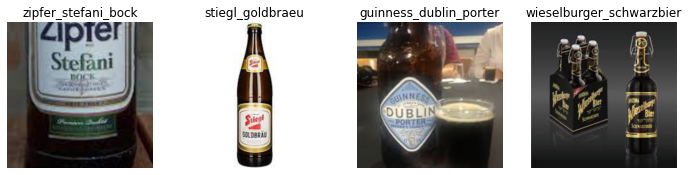

In [24]:
beer_dataloader.show_batch(max_n = 4, nrows= 1)

In [13]:
learner = cnn_learner(beer_dataloader,resnet34,metrics=error_rate)

In [26]:
learner.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.000001,0.473906,0.089041,00:11


epoch,train_loss,valid_loss,error_rate,time
0,0.000005,0.475241,0.089041,00:14
1,0.000007,0.470270,0.075342,00:14
2,0.000008,0.468857,0.089041,00:14


In [16]:
learner.export('biersorten_classifier.pkl')

In [17]:
#copy learner on gdrive
!cp /content/biersorten_classifier.pkl /content/drive/MyDrive/Biersortenerkenner/biersorten_classifier.pkl

In [18]:
#copy exported learner from gdrive

!cp drive/MyDrive/Biersortenerkenner/biersorten_classifier.pkl ./

In [ ]:
path = Path();

inference = load_learner(path/'biersorten_classifier.pkl')

In [ ]:
inference.predict('zipfer_maerzen_19.jpg')

('zipfer_maerzen',
 tensor(18),
 tensor([1.1063e-10, 9.3545e-14, 1.1275e-12, 7.7962e-12, 5.2037e-12, 3.8059e-12,
         1.6093e-10, 1.1457e-09, 6.8382e-12, 1.6371e-11, 2.8801e-09, 5.4639e-12,
         2.6451e-12, 4.2447e-11, 1.4866e-12, 6.2051e-12, 5.2494e-13, 1.2080e-10,
         1.0000e+00, 1.0114e-09, 1.0266e-11]))